In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas
import numpy as np

In [2]:
# experimental data 
df = pandas.read_csv( 'updated_data_set.csv', index_col=0 ) 

# get lowest 10 of each protein from enzyme design models 
enzyme_design_feature_set = pandas.read_csv( '../data_sets/rosetta/enzyme_design_talaris_2013.csv' )
enzyme_design_feature_set = enzyme_design_feature_set.groupby( 'name' ).apply( lambda x: x.sort_values( by='total_score' ).head( 10 ).mean() ) 
#enzyme_design_feature_set.index = enzyme_design_feature_set.name 

In [3]:
df = df.join( enzyme_design_feature_set ) 
print df.sample( 5 ) 

print df.shape

       Unnamed: 1  sequence_pos  expression  tm_refit    tm        why_no_tm  \
mutant                                                                         
Y18A          NaN          18.0           1     38.26  37.2              NaN   
F415N         NaN         415.0           1       NaN   NaN  below detection   
E423S         NaN         423.0           1     39.50  39.9              NaN   
L171A         NaN         171.0           1     38.80  38.3              NaN   
W34A          NaN          34.0           0       NaN   NaN    no expression   

         kcat     km   kcatkm  ki        ...         SR_4_nlpstat_pm   SR_5  \
mutant                                   ...                                  
Y18A    197.0  31.55   6230.0 NaN        ...                   0.890  446.0   
F415N     1.0  23.10     43.0 NaN        ...                   0.874  446.0   
E423S   646.0   6.60  97777.0 NaN        ...                     NaN    NaN   
L171A   807.0  11.09  72719.0 NaN        ...

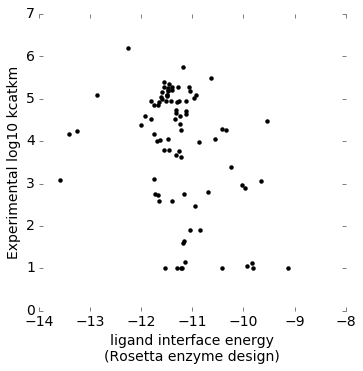

In [4]:
plt.figure( figsize=(5,5) )
plt.scatter( df.SR_5_interf_E_1_2, np.log10( df.kcatkm ), lw=0, c='k' ) 
plt.ylabel( 'Experimental log10 kcatkm' ) 
plt.xlabel( 'ligand interface energy\n(Rosetta enzyme design)' ) 
plt.box( 0 )
plt.tight_layout()
plt.rc( 'font', **{ 'size': 14, 'family': 'Source Sans Pro'} ) 
#plt.plot(  [df.SR_5_interf_E_1_2.min(), df.SR_5_interf_E_1_2.max()], [ 0,0], )

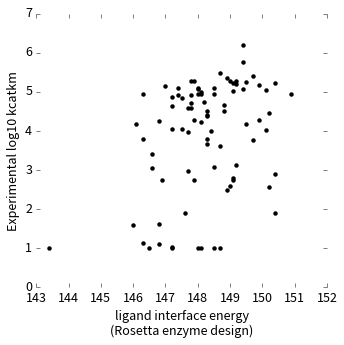

In [5]:
plt.figure( figsize=(5,5) )
plt.scatter( df.tot_NLconts_pm, np.log10( df.kcatkm ), lw=0, c='k' ) 
plt.ylabel( 'Experimental log10 kcatkm' ) 
plt.xlabel( 'ligand interface energy\n(Rosetta enzyme design)' ) 
plt.box( 0 )
plt.tight_layout()
plt.rc( 'font', **{ 'size': 14, 'family': 'Source Sans Pro'} ) 
#plt.plot(  [df.SR_5_interf_E_1_2.min(), df.SR_5_interf_E_1_2.max()], [ 0,0], )

In [7]:
my_cols = [ 'tm_refit', 'kcat', 'km', 'kcatkm' ] 

for my_col in my_cols:
    print my_col 
    print df.corr( method='pearson' )[ my_col ].sort_values( ascending=False )  

tm_refit
tm_refit                    1.000000
tm                          0.990558
err_k                       0.331823
percent_err_kcat            0.274818
tot_total_neg_charges       0.218251
err_km                      0.210108
SR_2_hbond_sc               0.204346
km                          0.197033
ki                          0.193722
gel_number                  0.189177
tot_nlsurfaceE_pm           0.166002
tot_NLconts_pm              0.150584
expression                  0.149279
kcatkm                      0.136366
SR_4_total_score            0.130906
SR_3_total_score            0.126076
SR_1_total_score            0.126076
sequence_pos                0.118572
err_kcat                    0.112380
SR_4_hbond_sc               0.104931
SR_3_pstat_pm               0.066877
SR_1_pstat_pm               0.066877
SR_4_nlpstat_pm             0.066211
eki                         0.062895
total_score                 0.060510
kcat                        0.060123
fa_rep                      0

In [8]:
df = pandas.read_csv( './xiaokang_features_predictions.csv', index_col=0 ) 
df.index = df.index.str.upper()
df.corr(method='pearson')['measured_kcatkm'].sort_values()

SR_5_hbond_sc           -0.523583
SR_5_total_score        -0.461703
SR_5_interf_E_1_2       -0.461156
hbond_sc                -0.351878
total_score             -0.340232
tot_nlsurfaceE_pm       -0.284834
SR_4_hbond_pm           -0.196633
SR_2_hbond_sc           -0.149156
SR_4_fa_rep             -0.117777
tot_burunsat_pm         -0.078476
SR_1_total_score        -0.077722
SR_3_total_score        -0.077722
tot_total_neg_charges   -0.068426
SR_1_all_cst            -0.060998
SR_3_all_cst            -0.060998
SR_5_fa_rep             -0.012213
tot_total_pos_charges    0.009676
SR_2_all_cst             0.039182
SR_4_pstat_pm            0.039821
tot_total_charge         0.051152
SR_5_burunsat_pm         0.055073
SR_4_nlpstat_pm          0.067415
SR_2_total_score         0.071192
SR_2_fa_rep              0.074125
SR_2_hbond_pm            0.086607
SR_4_total_score         0.096204
SR_2_pstat_pm            0.102095
SR_4_burunsat_pm         0.122509
SR_5_all_cst             0.128454
SR_3_nlpstat_p

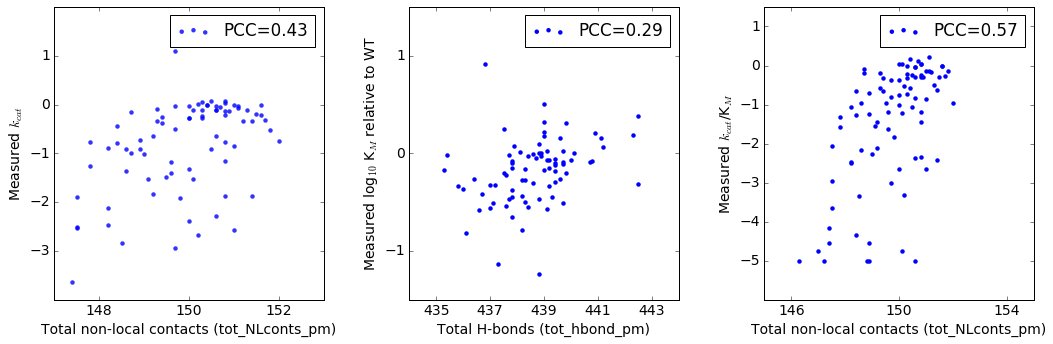

In [114]:
plt.figure( figsize=(15,5) ) 

plt.subplot( 1, 3, 1 ) 
plt.scatter( df.tot_NLconts_pm, df.measured_kcat, lw=0, alpha=.8 ) 
plt.xlabel( 'Total non-local contacts (tot_NLconts_pm)' )
plt.ylabel( 'Measured $k_{cat}$' ) 
plt.legend( [ 'PCC=0.43' ] ) 
plt.yticks( [ 1, 0, -1, -2, -3 ] )
plt.xticks( [ 148, 150, 152 ] ) 
#plt.xlim( 434, 444 ) 

plt.subplot( 1, 3, 2 ) 
plt.scatter( df.tot_hbond_pm, df.measured_km, lw=0 ) 
plt.xlabel( 'Total H-bonds (tot_hbond_pm)' )
plt.ylabel( 'Measured log$_{10}$ K$_M$ relative to WT' ) 
plt.xticks( [ 435, 437, 439, 441, 443 ] )
plt.xlim( 434, 444 ) 
plt.yticks( [ 1, 0, -1 ] ) 
plt.ylim( -1.5, 1.5 ) 
plt.legend( [ 'PCC=0.29' ] ) 

plt.subplot( 1, 3, 3 ) 
plt.scatter( df.tot_NLconts_pm, df.measured_kcatkm, lw=0 ) 
plt.xlabel( 'Total non-local contacts (tot_NLconts_pm)' )
plt.ylabel( 'Measured $k_{cat}$/K$_M$' ) 
plt.xticks( [ 146, 150, 154 ] )
plt.xlim( 145, 155 ) 
plt.legend( [ 'PCC=0.57' ] ) 
plt.ylim( -6, 1.5 ) 
plt.yticks( [ 1, 0, -1, -2, -3, -4, -5 ] ) 

plt.tight_layout()

/usr/local/bin/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/usr/local/bin/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/usr/local/bin/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))
/usr/local/bin/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=353.0, right=353.0
  'l

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a698e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11aa7f510>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c2b8310>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fb29fd0>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x1d777b250>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1dba56490>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1df6336d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1e1d9c490>]], dtype=object)

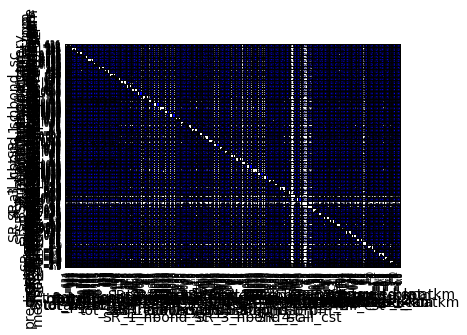

In [116]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix( df ) 